In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import os

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]
from metavision_core.event_io import RawReader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load recordings from the dataset


In [ ]:
dir_path = ["uvled_freq_dataset", "recordings"]
dir_path = os.path.join(*dir_path)

labels_1k = ["0.5 m @ 1kHz", "1 m @ 1kHz", "1.5 m @ 1kHz", "2 m @ 1kHz", "2.5 m @ 1kHz"]
labels_2_5k = ["0.5 m @ 2.5kHz", "1 m @ 2.5kHz", "1.5 m @ 2.5kHz", "2 m @ 2.5kHz", "2.5 m @ 2.5kHz"]
labels_5k =   ["0.5 m @ 5kHz", "1 m @ 5kHz", "1.5 m @ 5kHz", "2 m @ 5kHz", "2.5 m @ 5kHz"]
labels_10k =   ["0.5 m @ 10kHz", "1 m @ 10kHz", "1.5 m @ 10kHz", "2 m @ 10kHz", "2.5 m @ 10kHz"]

recordings_1k = [
	["1k", "0_5", "0", "recording_2024-10-02_11-23-21.raw"],
	["1k", "1",   "0", "recording_2024-10-02_11-24-05.raw"],
	["1k", "1_5", "0", "recording_2024-10-02_11-25-25.raw"],
	["1k", "2",   "0", "recording_2024-10-02_11-27-49.raw"],
	["1k", "2_5", "0", "recording_2024-10-02_11-28-40.raw"]
]

recordings_2_5k = [
	["2.5k", "0_5", "0", "recording_2024-10-02_11-20-10.raw"],
	["2.5k", "1",   "0", "recording_2024-10-02_11-19-19.raw"],
	["2.5k", "1_5", "0", "recording_2024-10-02_11-14-51.raw"],
	["2.5k", "2",   "0", "recording_2024-10-02_11-13-56.raw"],
	["2.5k", "2_5", "0", "recording_2024-10-02_11-11-28.raw"]
]

recordings_5k = [
	["5k", "0_5", "0", "recording_2024-10-02_10-26-52.raw"],
	["5k", "1",   "0", "recording_2024-10-02_10-30-16.raw"],
	["5k", "1_5", "0", "recording_2024-10-02_10-31-29.raw"],
	["5k", "2",   "0", "recording_2024-10-02_11-06-24.raw"],
	["5k", "2_5", "0", "recording_2024-10-02_11-09-53.raw"]
]

recordings_10k = [
	["10k", "0_5", "0", "recording_2024-10-02_10-24-16.raw"],
	["10k", "1",   "0", "recording_2024-10-02_10-21-46.raw"],
	["10k", "1_5", "0", "recording_2024-10-02_10-20-07.raw"],
	["10k", "2",   "0", "recording_2024-10-02_10-16-39.raw"],
	["10k", "2_5", "0", "recording_2024-10-02_10-15-26.raw"]
]

recordings_1k = list(map(lambda x: os.path.join(dir_path, *x), recordings_1k))
recordings_2_5k = list(map(lambda x: os.path.join(dir_path, *x), recordings_2_5k))
recordings_5k = list(map(lambda x: os.path.join(dir_path, *x), recordings_5k))
recordings_10k = list(map(lambda x: os.path.join(dir_path, *x), recordings_10k))

raws_1k = [RawReader(r) for r in recordings_1k]
raws_2_5k = [RawReader(r) for r in recordings_2_5k]
raws_5k = [RawReader(r) for r in recordings_5k]
raws_10k = [RawReader(r) for r in recordings_10k]

### Visualize the data to be sure

In [ ]:
from plotting import visualize_data_raws

visualize_data_raws(raws_1k, labels_1k)
visualize_data_raws(raws_2_5k, labels_2_5k)
visualize_data_raws(raws_5k, labels_5k)
visualize_data_raws(raws_10k, labels_10k)

### Locate the UV LEDs in the data

In [ ]:
from util import find_bounding_boxes

#run multiple times if error gets raised here
try:
	bb_1k = [find_bounding_boxes(r)[0][0] for r in raws_1k]
	bb_2_5k = [find_bounding_boxes(r)[0][0] for r in raws_2_5k]
	bb_5k =   [find_bounding_boxes(r)[0][0] for r in raws_5k]
	#bb_10k =   [find_bounding_boxes(r)[0][0] for r in raws_10k]

except Exception as e:
	print("Try running this again.")
	raise(e)

print(bb_2_5k)
#print(bb_10k)

[(761.0, 325.0, 781.0, 345.0), (461.0, 356.0, 481.0, 376.0), (143.0, 372.0, 163.0, 392.0), (926.0, 380.0, 946.0, 400.0), (544.0, 377.0, 564.0, 397.0)]


### Visualize the bounding boxes in the data

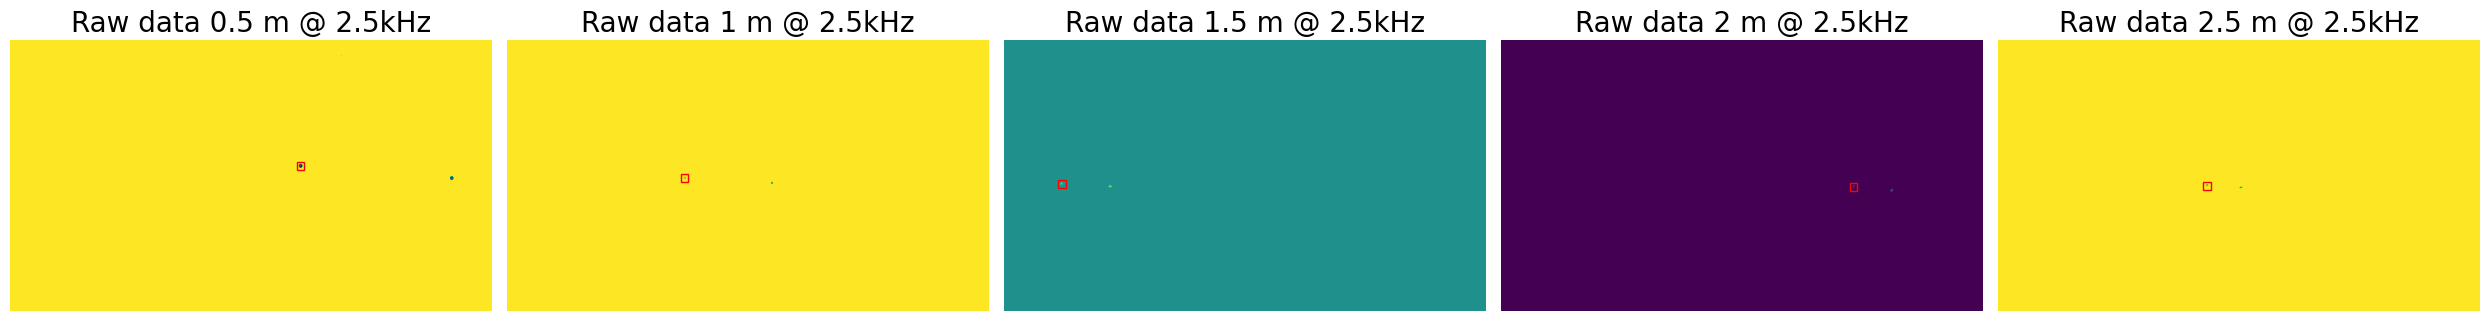

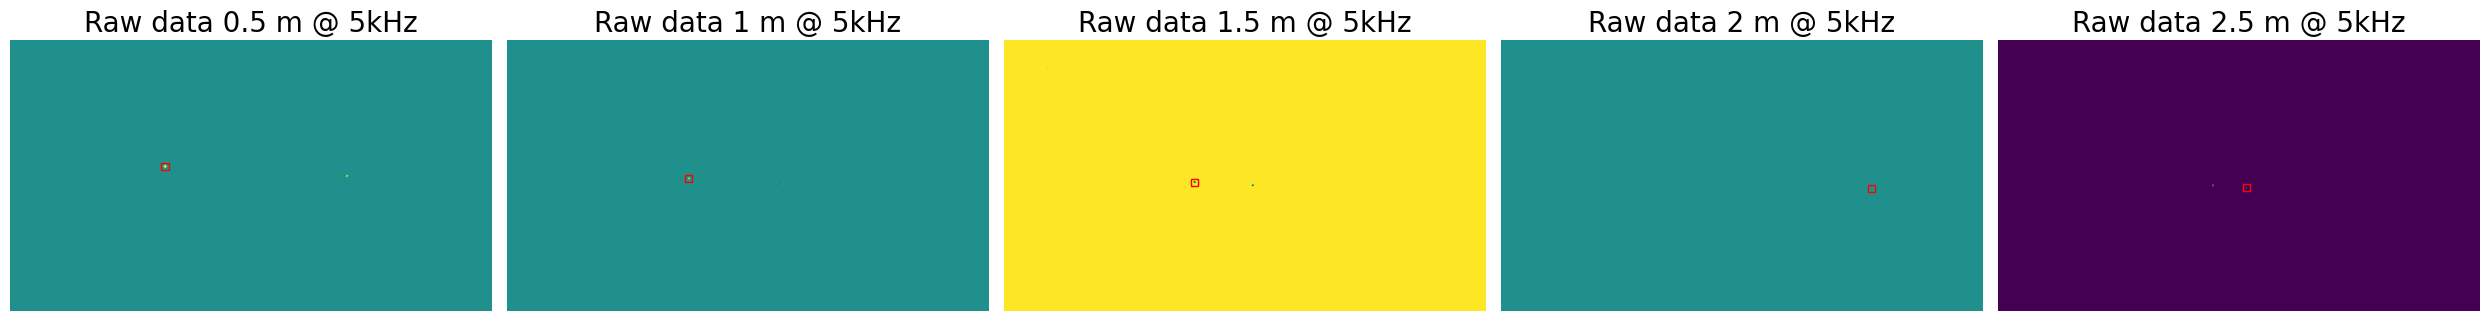

In [ ]:
visualize_data_raws(raws_2_5k, labels_2_5k, boxes=bb_2_5k)
visualize_data_raws(raws_5k, labels_5k, boxes=bb_5k)

### Filter only the important events that are located inside of the bounding boxes

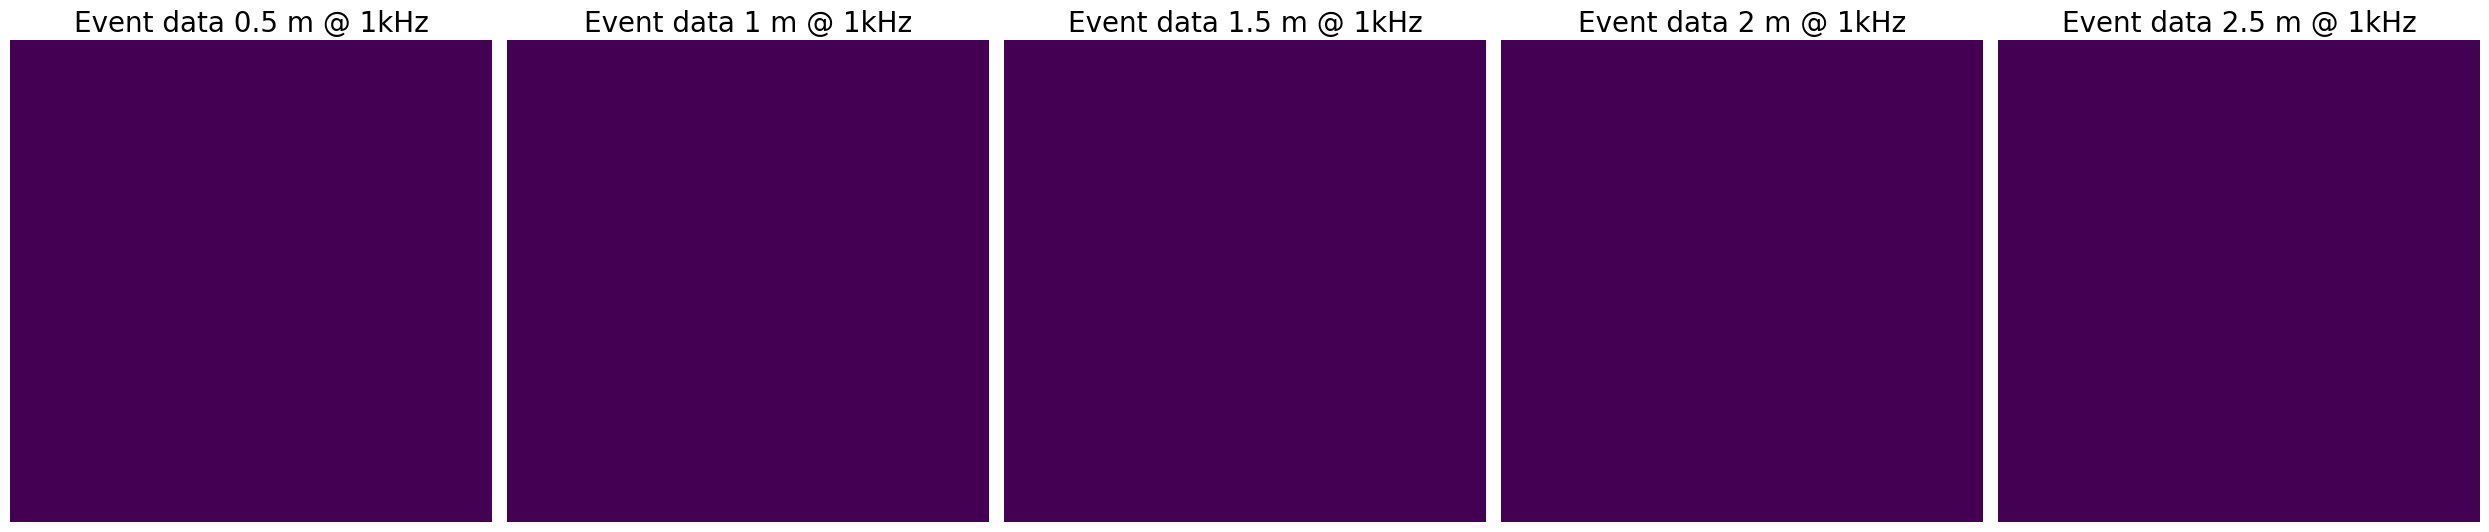

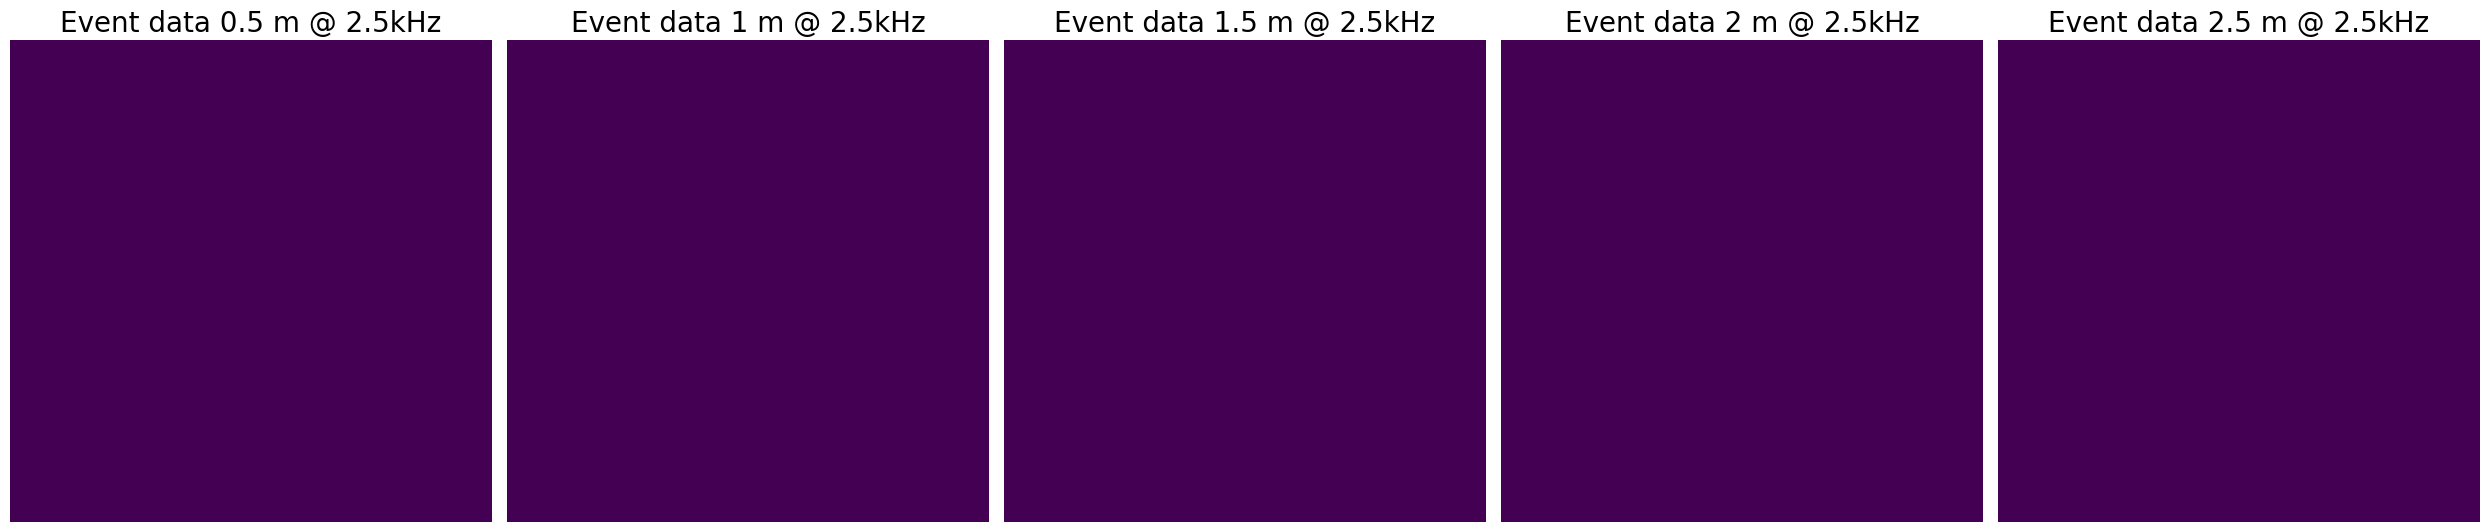

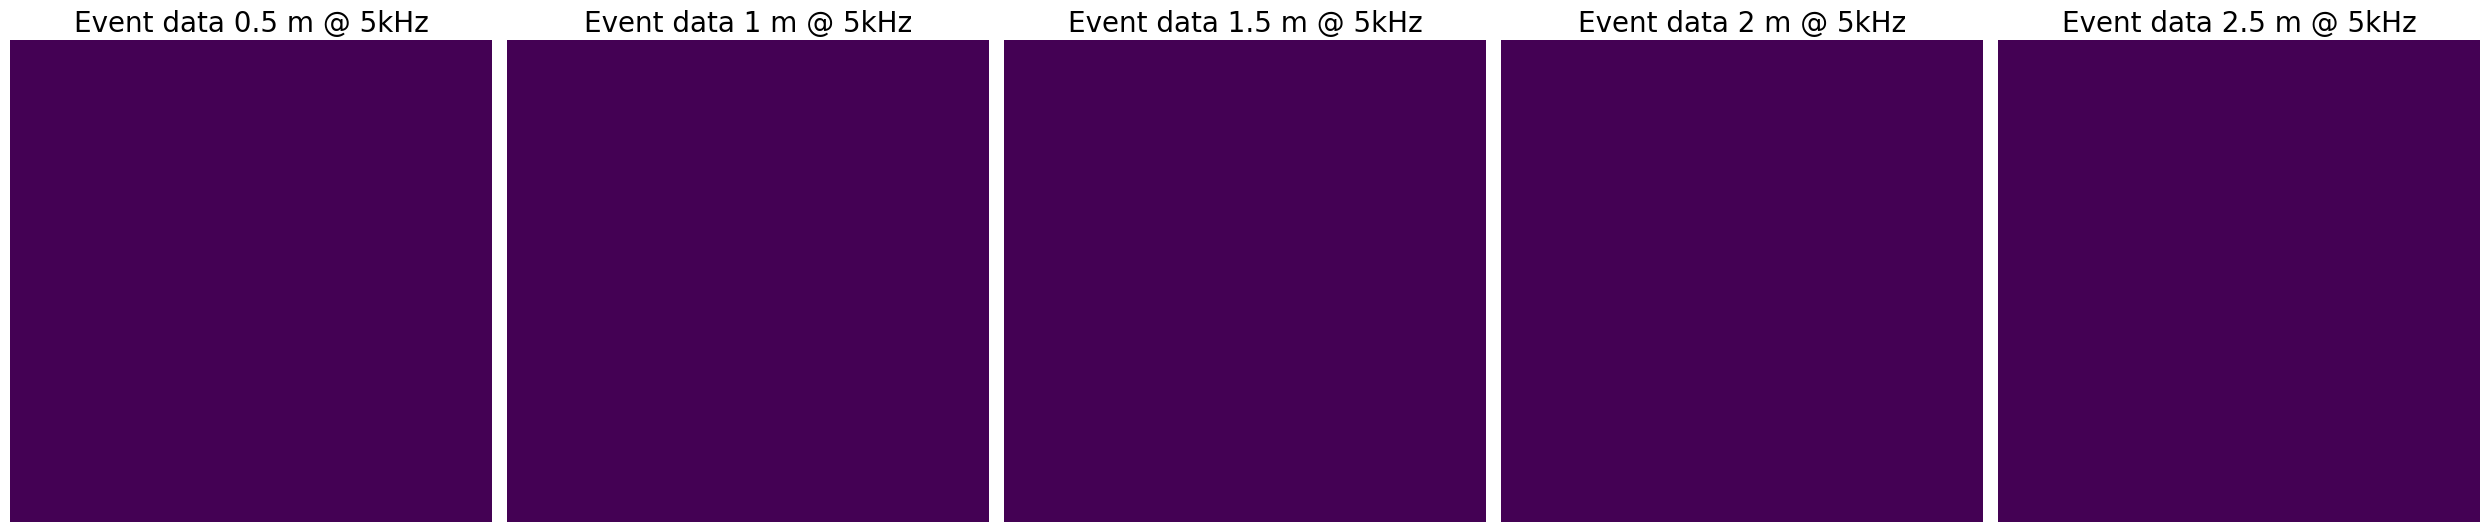

In [ ]:
from util import filter_raws, move_events
from plotting import visualize_data_events

#bounding boxes need to be passed as an array
__f_1k = [(r, [bb_1k[i]]) for i, r in enumerate(raws_1k)]
__f_2_5k = [(r, [bb_2_5k[i]]) for i, r in enumerate(raws_2_5k)]
__f_5k = [(r, [bb_5k[i]]) for i, r in enumerate(raws_5k)]

f_events_1k = filter_raws(__f_1k)
f_events_2_5k = filter_raws(__f_2_5k)
f_events_5k = filter_raws(__f_5k)

f_events_1k = [move_events(e) for e in f_events_1k]
f_events_2_5k = [move_events(e) for e in f_events_2_5k]
f_events_5k = [move_events(e) for e in f_events_5k]

visualize_data_events(f_events_1k, labels_1k)
visualize_data_events(f_events_2_5k, labels_2_5k)
visualize_data_events(f_events_5k, labels_5k)

### Frequency analysis demo

In [ ]:
# from metavision_sdk_analytics import DominantFrequencyEventsAlgorithm

# min_freq = 100
# max_freq = 30000
# freq_precision=10
# min_count = 0

# dominant_freq_algo = DominantFrequencyEventsAlgorithm(frequency_precision = freq_precision, min_frequency = min_freq, max_frequency = max_freq, min_count = min_count)

# r = raws_5k[0]
# r.reset()
# evs = r.load_n_events(150000)

# # print(evs.shape)
# # print(evs.dtype)

# print(f"Frequency: {dominant_freq_algo.compute_dominant_value(evs)[1]} Hz")


### Analyze the LEDs

In [ ]:
# from plotting import create_combined_plot
# from util import cut_timelt_events, estimate_frequency_from_raw, polarize_events
# import numpy as np

# p = 1

# cut_time = 1000 #in us

# pf_events_2_5k = [polarize_events(cut_timelt_events(x, cut_time), p) for x in f_events_2_5k]
# pf_events_5k = [polarize_events(cut_timelt_events(x, cut_time), p) for x in f_events_5k]

# dominant_freq_algo.compute_dominant_value(pf_events_2_5k[0])

# freqs_2_5k = [estimate_frequency_from_raw(r, num_events=150000) for r in raws_2_5k]
# freqs_5k = [estimate_frequency_from_raw(r, num_events=150000) for r in raws_5k]

# for (x, f) in zip(pf_events_2_5k, freqs_2_5k):
# 	create_combined_plot(x, f)

# for (x, f) in zip(pf_events_5k, freqs_5k):
# 	create_combined_plot(x, f)

### Testing the influence of distance on the event camera

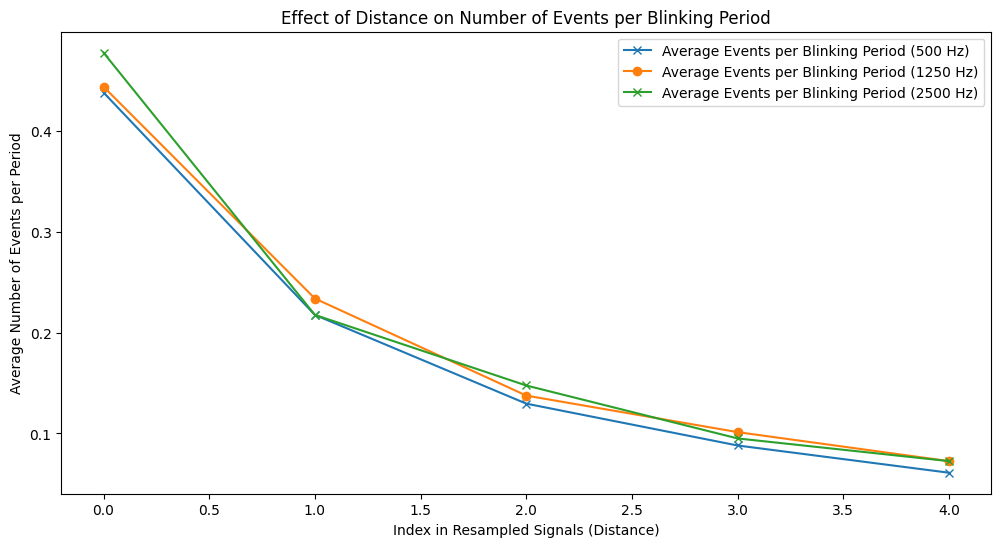

In [ ]:
from util import resample_by_polarity, raws_load_events

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

frequency_1k = 1 / 2  # Frequency of the 2.5k dataset in kHz
frequency_2_5k = 2.5 / 2  # Frequency of the 2.5k dataset in kHz
frequency_5k = 2.5  # Frequency of the 5k dataset in kHz

# Convert these frequencies to periods in timestamps (assuming timestamps are in milliseconds)
# Period = 1 / Frequency in seconds, so multiply by 1000 to get period in milliseconds
blinking_period_1k = int(1 / frequency_1k * 1000)
blinking_period_2_5k = int(1 / frequency_2_5k * 1000)
blinking_period_5k = int(1 / frequency_5k * 1000)

# Resample the data
resampled_1k = [resample_by_polarity(x) for x in raws_load_events(raws_1k)]
resampled_2_5k = [resample_by_polarity(x) for x in raws_load_events(raws_2_5k)]
resampled_5k = [resample_by_polarity(x) for x in raws_load_events(raws_5k)]

# Function to align the signal by finding the first peak
def align_signal(signal, period):
    peaks, _ = find_peaks(signal, distance=period // 2)
    if peaks.size > 0:
        # Align to the first detected peak
        start_index = peaks[0]
        return signal[start_index:]
    else:
        # If no peaks are found, return the signal as is
        return signal

# Align both datasets
aligned_1k = [align_signal(signal, blinking_period_1k) for signal in resampled_1k]
aligned_2_5k = [align_signal(signal, blinking_period_2_5k) for signal in resampled_2_5k]
aligned_5k = [align_signal(signal, blinking_period_5k) for signal in resampled_5k]

# Calculate the average events per period over increasing distance (index)
avg_events_1k = [np.mean(signal[:blinking_period_1k]) for signal in aligned_1k]
avg_events_2_5k = [np.mean(signal[:blinking_period_2_5k]) for signal in aligned_2_5k]
avg_events_5k = [np.mean(signal[:blinking_period_5k]) for signal in aligned_5k]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(avg_events_1k, label='Average Events per Blinking Period (500 Hz)', linestyle='-', marker='x')
plt.plot(avg_events_2_5k, label='Average Events per Blinking Period (1250 Hz)', linestyle='-', marker='o')
plt.plot(avg_events_5k, label='Average Events per Blinking Period (2500 Hz)', linestyle='-', marker='x')
plt.xlabel('Index in Resampled Signals (Distance)')
plt.ylabel('Average Number of Events per Period')
plt.title('Effect of Distance on Number of Events per Blinking Period')
plt.legend()
plt.show()

